In [2]:
# relavant libraries

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_time_delayed_embedding(time_series, delay, dimension):
    delayed_data = []
    for i in range(dimension):
        delayed_data.append(time_series[i*delay:])

    for i in range(dimension):
        delayed_data[i] = delayed_data[i][:len(delayed_data[dimension-1])]
    return delayed_data


In [4]:
# setup the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [5]:
# load the text
fname = 'text.txt'
with open(fname, 'r') as file:
    text = file.read()

In [6]:
text

'The Enchanted Forest\n\nIn the heart of the sprawling kingdom of Eldoria lay the Enchanted Forest, a mystical realm shrouded in ancient magic and guarded by mythical creatures. The forest was a place of legend, known to all but understood by few. Only those with pure hearts and noble intentions could navigate its labyrinthine paths and unlock its secrets.\n\nEldoria\'s ruler, King Alaric, was a wise and benevolent monarch who had long sought to protect the Enchanted Forest from those who wished to exploit its magic. He had decreed that only the worthy could enter, and even then, they had to prove their worthiness through a series of tests.\n\nOne such worthy soul was a young knight named Sir Cedric. Known for his bravery and kindness, Sir Cedric had spent years preparing for his journey into the Enchanted Forest. Armed with a sword forged from the finest Eldorian steel and a shield bearing the crest of his noble family, he set out on his quest at the break of dawn.\n\nAs Sir Cedric ve

In [7]:
# transform the text in to list of tokens
tokens = tokenizer.tokenize(text)

In [8]:
# get the embeddings of each token convert the tensor into numpy arrays
all_embeddings = []
for token in tokens:
    token_id = tokenizer.convert_tokens_to_ids([token])[0]
    embedding = model.embeddings.word_embeddings(torch.tensor([token_id]))
    all_embeddings.append(embedding[0].detach().numpy())

# convert the list of numpy arrays into a matrix
all_embeddings = np.array(all_embeddings).T
all_embeddings.shape

(768, 4573)

In [9]:
pca = PCA(n_components=1)
pca.fit(all_embeddings)


PCA(n_components=1)

In [10]:
time_series = pca.components_[0]
len(time_series)

4573

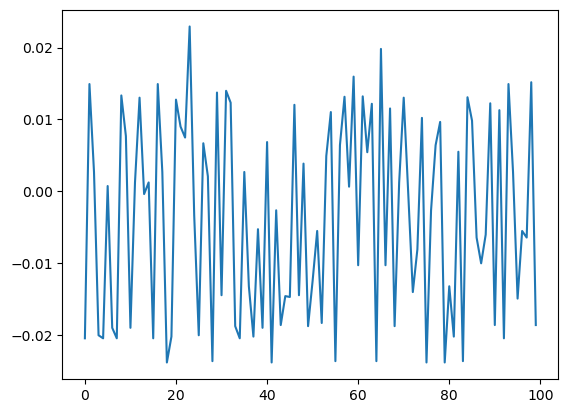

In [11]:
plt.plot(time_series[:100])
plt.show()

In [ ]:
x = get_time_delayed_embedding(time_series, 1, 3)

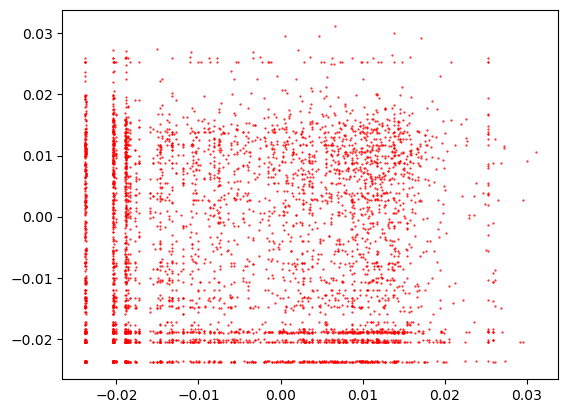

In [13]:
end = -1
plt.plot(x[:end], y[:end], 'r.', markersize=1)
plt.show()